In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Electric_Production.csv')

In [3]:
data.shape

(397, 2)

In [5]:
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
data.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


### So we have the data from 1985 to 2018

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


### Our Date column is in object format, for performing Time series algorithm on dataset, the date column should be in DateTime format.

In [7]:
data.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

### we don't have any missing values.

### Now we convert date column into DateTime format. for that we use pandas's function which is pd.to_datetime.

In [8]:
data.DATE = pd.to_datetime(data.DATE,errors = 'coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


### Now, see our column is in DateTime format.

In [10]:
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [11]:
data.tail()

,DATE,IPG2211A2N
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212
396,2018-01-01,129.4048


<Axes: >

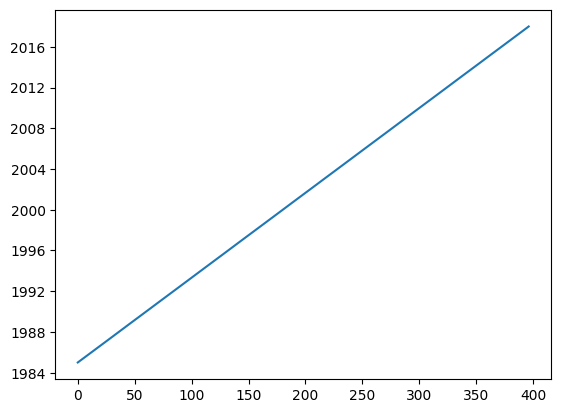

In [13]:
data.DATE.plot(kind='line')

### from above we can't see the proper, for that we have to add the index into our data

In [14]:
data.index = data.DATE

In [15]:
data = data.drop("DATE",axis =1)

<Axes: xlabel='DATE'>

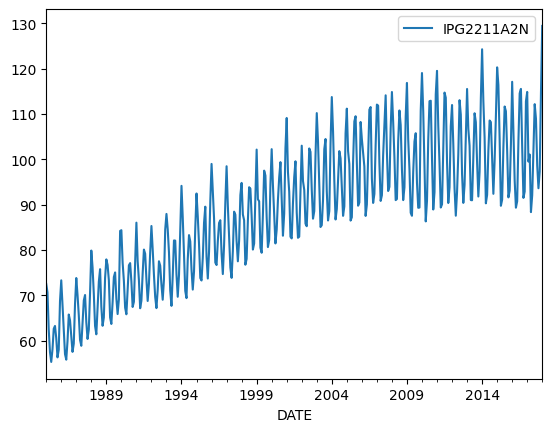

In [16]:
data.plot(kind='line')

### Here, we clearly see the trend.

### after that we have to perform the Hypothesis test on top of it.
### here we use adfuller and kpss. adfuller should be <0.05 and kpss should be >0.05

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(data)

(-2.2569903500472472,
 0.18621469116586692,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [21]:
from statsmodels.tsa.stattools import kpss

In [22]:
kpss(data)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(3.5315970094994853,
 0.01,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### We've got the p-value = 0.18621 for adfuller. and for kpss p-value = 0.01. which means our data is not in stationary form.

In [23]:
# to overcome this we use Diff()

datadiff = data.diff()

In [24]:
datadiff.head()

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563


In [25]:
datadiff = datadiff.dropna()

<Axes: xlabel='DATE'>

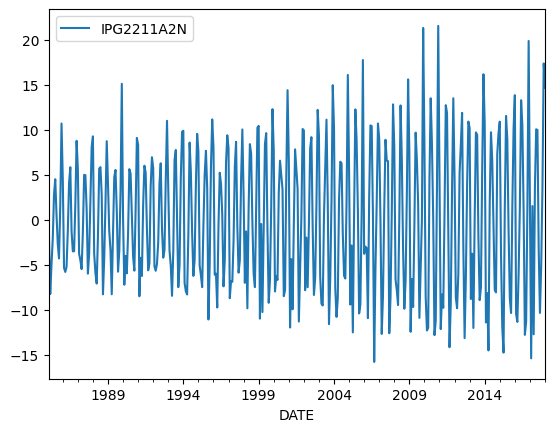

In [26]:
datadiff.plot(kind='line')

In [27]:
adfuller(datadiff)

(-7.104890882267308,
 4.0777865655395155e-10,
 14,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.5415092614141)

In [28]:
kpss(datadiff)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.14518934657460816,
 0.1,
 34,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### yeeesss! we've got the value. for adfuller p-value =4.0777865655395155e-10 which is <0.05 and for kpss p-value = 0.1 

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

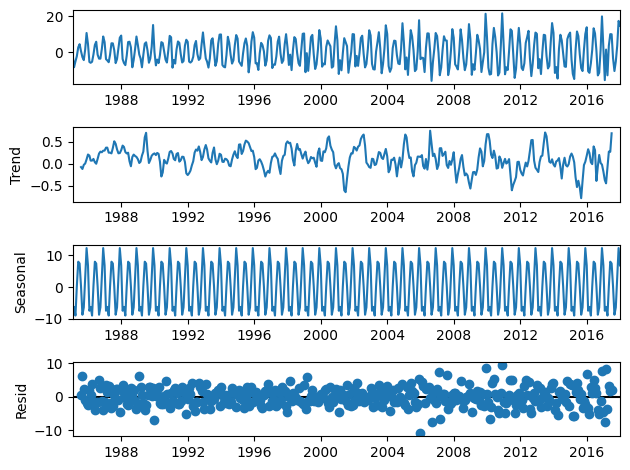

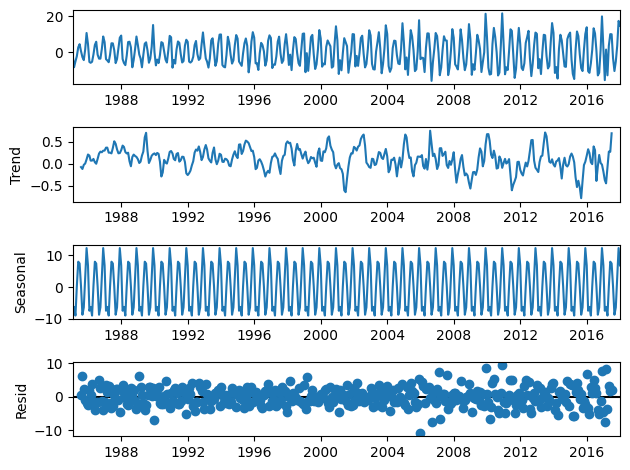

In [31]:
seasonal_decompose(datadiff).plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

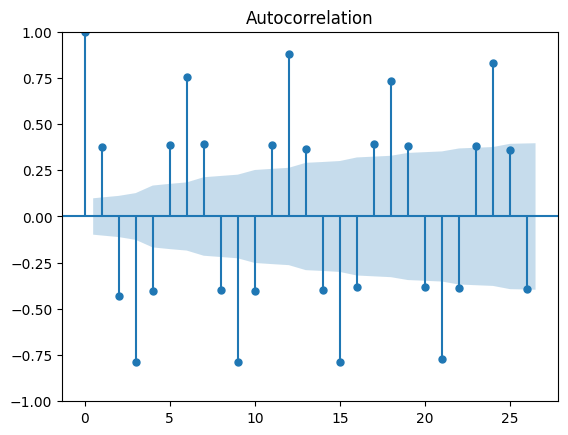

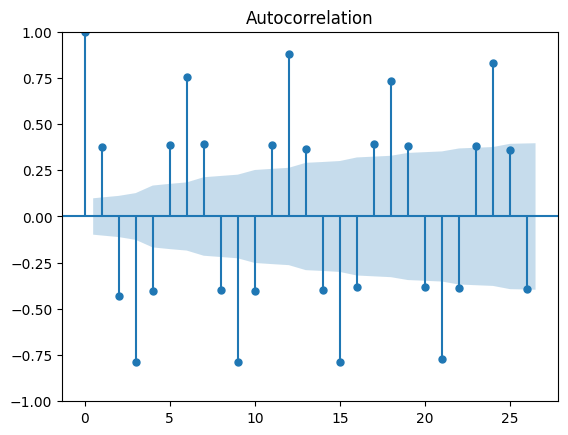

In [33]:
plot_acf(datadiff)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


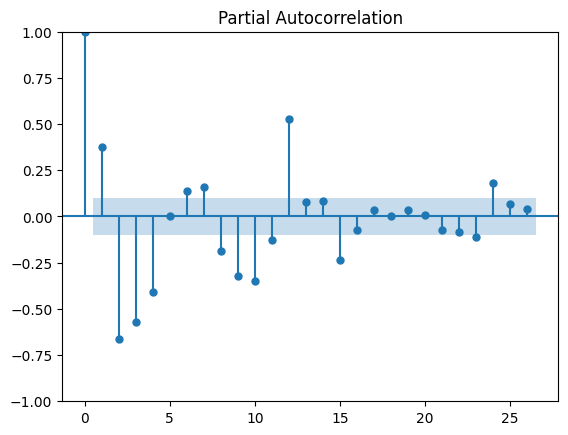

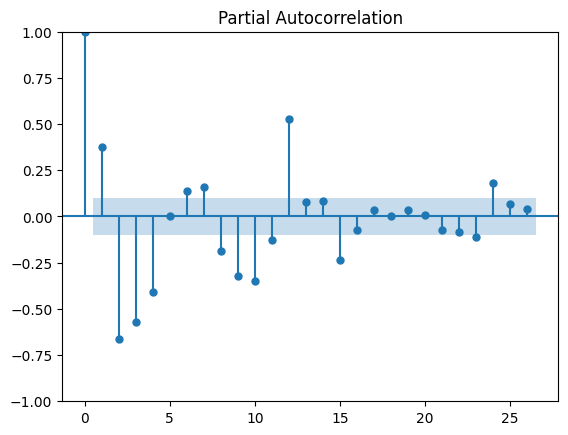

In [34]:
plot_pacf(datadiff)

In [35]:
from pmdarima.arima import auto_arima

In [36]:
arima_model = auto_arima(datadiff)

In [37]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(2, 0, 4)   Log Likelihood               -1021.380
Date:                Tue, 13 Jun 2023   AIC                           2058.760
Time:                        20:03:12   BIC                           2090.611
Sample:                    02-01-1985   HQIC                          2071.378
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1098      0.023      4.713      0.000       0.064       0.155
ar.L1          0.9985      0.002    512.702      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -759.992      0.000      -1.002      -0.997
ma.L1         -1.3621      0.038    -35.693      0.000      -1.437      -1.287
ma.L2          0.9179      0.071     12.843      0.000       0.778       1.058
ma.L3          0.0134      0.072      0.187      0.851      -0.127       0.154
ma.L4         -0.4382      0.042    -10.389      0.000      -0.521      -0.355
sigma2         9.9162      0.637     15.571      0.000       8.668      11.164
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                21.83
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

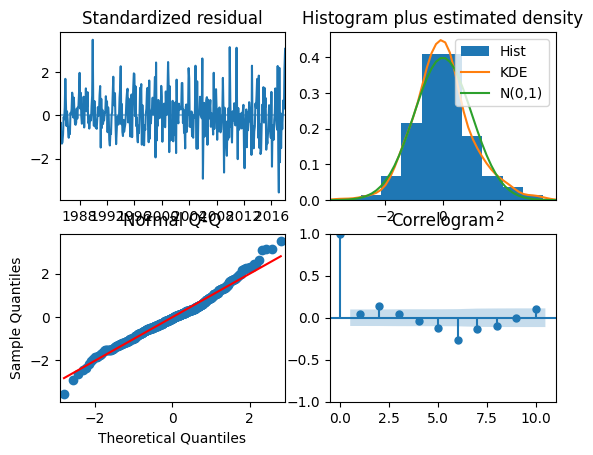

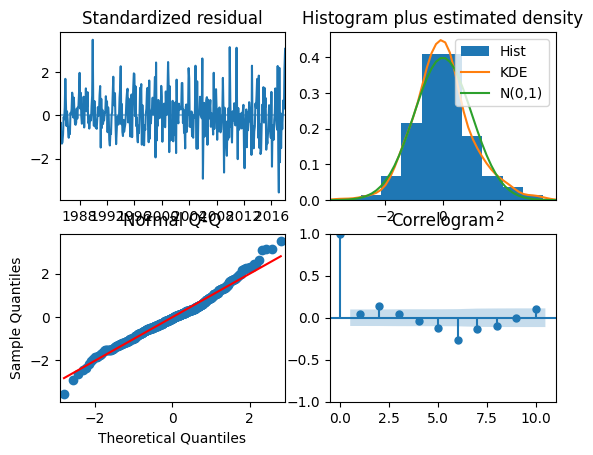

In [38]:
arima_model.plot_diagnostics()

In [39]:
datapredict = pd.DataFrame(arima_model.predict(n_periods=24))

In [40]:
index_of_fc = pd.date_range(datadiff.index[-1],periods=24,freq="M")

In [41]:
datapredict.index = index_of_fc

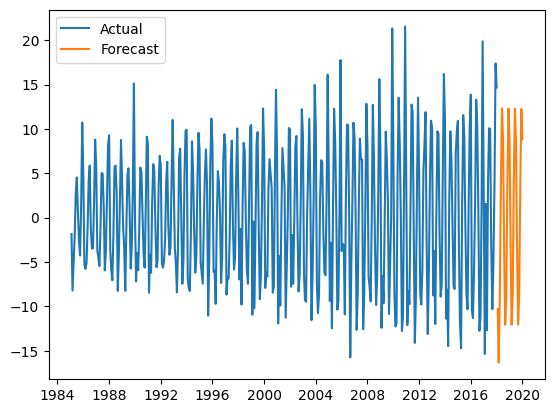

In [42]:
plt.plot(datadiff,label='Actual')
plt.plot(datapredict,label='Forecast')
plt.legend()
plt.show()

In [43]:
from prophet import Prophet

In [44]:
data = data.reset_index()

In [45]:
data.columns = ['ds','y']

In [46]:
m = Prophet()
m.fit(data)

20:06:59 - cmdstanpy - INFO - Chain [1] start processing
20:07:04 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future = m.make_future_dataframe(periods=24,freq='M')

In [48]:
future.tail()

,ds
416,2019-08-31
417,2019-09-30
418,2019-10-31
419,2019-11-30
420,2019-12-31


In [51]:
forecast = m.predict(future)
np.round(forecast).tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
416,2019-08-31,104.0,99.0,106.0,104.0,104.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,102.0
417,2019-09-30,104.0,92.0,99.0,104.0,104.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,0.0,0.0,95.0
418,2019-10-31,104.0,93.0,101.0,104.0,104.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,0.0,0.0,0.0,97.0
419,2019-11-30,104.0,102.0,109.0,104.0,105.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,106.0
420,2019-12-31,104.0,115.0,122.0,104.0,105.0,14.0,14.0,14.0,14.0,14.0,14.0,0.0,0.0,0.0,119.0


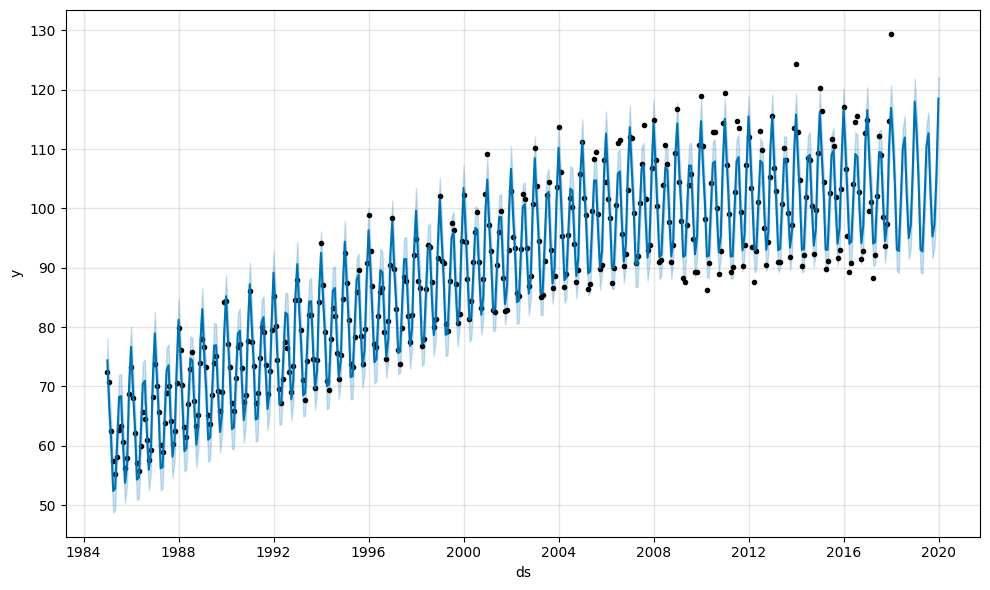

In [52]:
fig1 = m.plot(forecast)

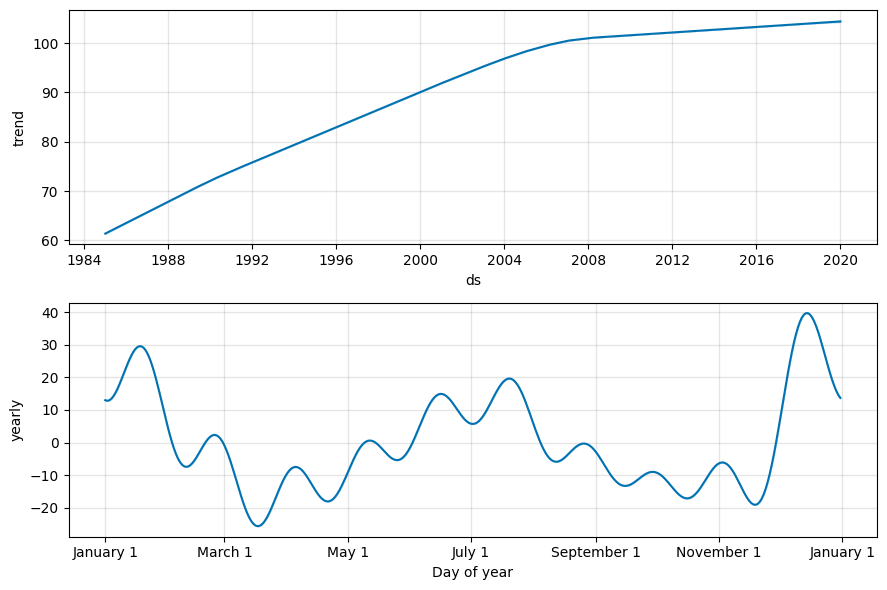

In [53]:
fig2 = m.plot_components(forecast)

In [54]:
from prophet.plot import plot_plotly,plot_components_plotly

In [57]:
plot_plotly(m,forecast)

In [56]:
plot_components_plotly(m,forecast)

C:\Users\Hp\anaconda3\lib\site-packages\plotly\io\_json.py:534: UserWarning:

Discarding nonzero nanoseconds in conversion.

